In [1]:
original_source_file = "../../interactive_pcd_lib/analyse_pcd_similarity2/source_cloud.ply"
raycasted_source_file = "../../interactive_pcd_lib/analyse_pcd_similarity2/jan31_raycasted1.ply"

In [2]:
import open3d as o3d

pcd_source = o3d.io.read_point_cloud(original_source_file)
pcd_raycasted = o3d.io.read_point_cloud(raycasted_source_file)

In [3]:
print(len(pcd_source.points), " : Source Points ")
print(len(pcd_raycasted.points), " : Raycasted Points ")

271  : Source Points 
323  : Raycasted Points 


In [7]:
radius = 0.3
max_nn = 6
pcd_tree = o3d.geometry.KDTreeFlann(pcd_source)

In [ ]:
distances = []

for point in np.asarray(pcd_source.points):
    _, idx, _ = pcd_tree.search_hybrid_vector_3d(point, radius=0.1, max_nn=1)
    nearest_point = np.asarray(pcd2.points)[idx[0]]
    distance = np.linalg.norm(point - nearest_point)
    distances.append(distance)

In [9]:
pcd_tree.search_hybrid_vector_3d(pcd_raycasted.points[0], radius=radius, max_nn=max_nn)

(6,
 IntVector[63, 74, 85, 52, 75, 64],
 DoubleVector[0.00337638, 0.00349259, 0.00834584, 0.00918031, 0.0101853, 0.0102923])

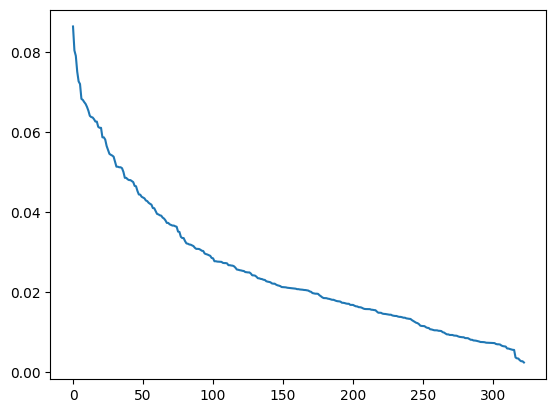

In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt

radius = 0.3
max_nn = 6

distances = []

pcd_tree = o3d.geometry.KDTreeFlann(pcd_source)

for point_raycasted in pcd_raycasted.points:
    k, idx, dist = pcd_tree.search_hybrid_vector_3d(point_raycasted, radius=radius, max_nn=max_nn)
    distances.append(math.sqrt(np.asarray(dist)[0]))
    
distances = sorted(distances, reverse=True)

plt.plot(distances)

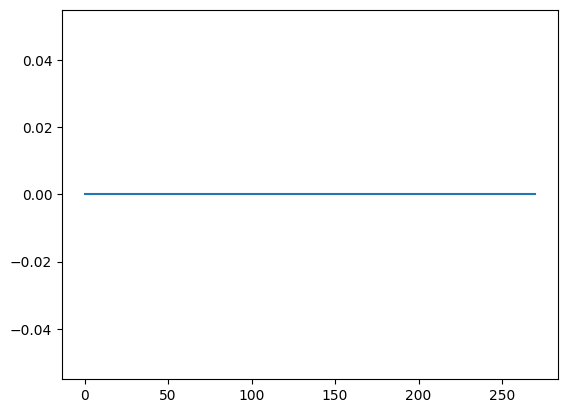

In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt

radius = 0.3
max_nn = 6

distances = []

pcd_tree = o3d.geometry.KDTreeFlann(pcd_source)

for point_source in pcd_source.points:
    k, idx, dist = pcd_tree.search_hybrid_vector_3d(point_source, radius=radius, max_nn=max_nn)
    distances.append(math.sqrt(np.asarray(dist)[0]))
    
distances = sorted(distances, reverse=True)

plt.plot(distances)

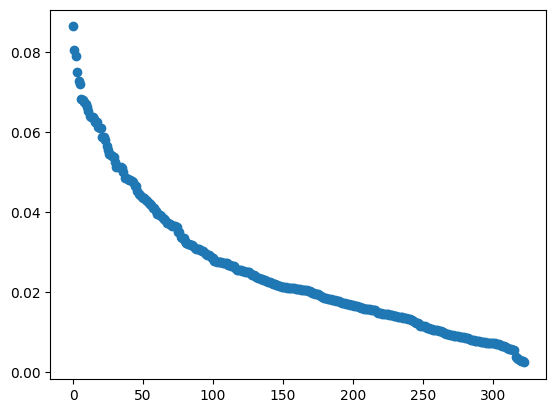

In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt

radius = 0.1
max_nn = 3

distances = []

pcd_tree = o3d.geometry.KDTreeFlann(pcd_source)

for point_raycasted in pcd_raycasted.points:
    k, idx, dist = pcd_tree.search_hybrid_vector_3d(point_raycasted, radius=radius, max_nn=max_nn)
    distances.append(math.sqrt(np.asarray(dist)[0]))
    
distances = sorted(distances, reverse=True)

plt.scatter(list(range(len(distances))), distances)

In [21]:
import math
import numpy as np
import matplotlib.pyplot as plt

radius = 0.1
max_nn = 3

distances = []

pcd_tree = o3d.geometry.KDTreeFlann(pcd_source)

for point_raycasted in pcd_raycasted.points:
    k, idx, dist = pcd_tree.search_hybrid_vector_3d(point_raycasted, radius=radius, max_nn=max_nn)
    distances.append(math.sqrt(np.asarray(dist)[0]))
    
distances = sorted(distances, reverse=True)

avg_distance = sum(distances)/len(distances)

# Calculating the best neighbour and distance to the neighbour and plot

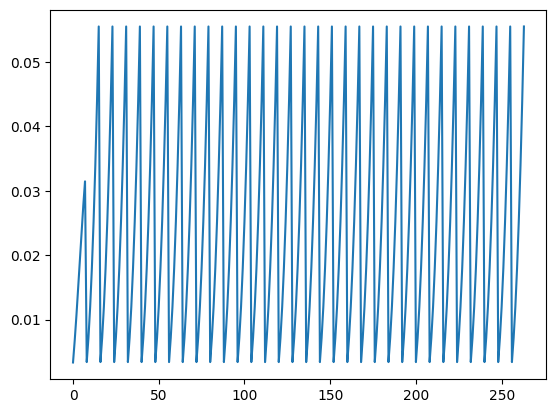

In [12]:

import math
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d



original_source_file = "../../interactive_pcd_lib/analyse_pcd_similarity2/source_cloud.ply"
raycasted_source_file = "../../interactive_pcd_lib/analyse_pcd_similarity2/jan31_raycasted1.ply"


pcd_source = o3d.io.read_point_cloud(original_source_file)
pcd_raycasted = o3d.io.read_point_cloud(raycasted_source_file)

radius_list = np.arange(0.1, 10, 0.3)
max_nn_list = [i for i in range(2, 10)]

radius_max_nn_combination = [(i, j) for i in radius_list for j in max_nn_list]
# print(radius_max_nn_combination)

avg_dist_dict = {}
avg_dist_list = []
indx = 0
pcd_tree = o3d.geometry.KDTreeFlann(pcd_source)
for radius, max_nn in radius_max_nn_combination:
    distances = []
    for point_raycasted in pcd_raycasted.points:
        k, idx, dist = pcd_tree.search_hybrid_vector_3d(point_raycasted, radius=radius, max_nn=max_nn)
        # print(k,idx, dist)
        if len(dist) == 0:
            distances.append(0)
        else:
            # distances.append(math.sqrt(np.asarray(dist)[0]))
            # distances.append(np.asarray(dist)[0])
            distances.append(np.asarray(dist).sum())

    avg_dist = sum(distances)/len(distances)
    # avg_dist_dict[indx] = avg_dist
    avg_dist_list.append(avg_dist)
    
    # indx += 1
    
plt.plot(avg_dist_list)   

Text(0, 0.5, 'Avg Distance between Corresponding Points')

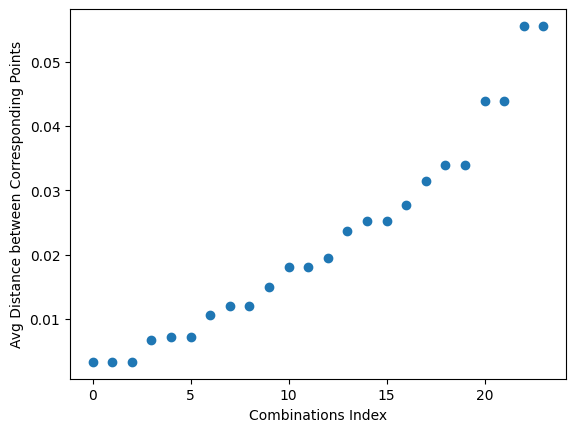

In [25]:

import math
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d



original_source_file = "../../interactive_pcd_lib/analyse_pcd_similarity2/source_cloud.ply"
raycasted_source_file = "../../interactive_pcd_lib/analyse_pcd_similarity2/jan31_raycasted1.ply"


pcd_source = o3d.io.read_point_cloud(original_source_file)
pcd_raycasted = o3d.io.read_point_cloud(raycasted_source_file)

radius_list = np.arange(0.1, 1, 0.3)
max_nn_list = [i for i in range(2, 10)]

radius_max_nn_combination = [(i, j) for i in radius_list for j in max_nn_list]
# print(radius_max_nn_combination)

avg_dist_dict = {}
avg_dist_list = []
indx = 0
pcd_tree = o3d.geometry.KDTreeFlann(pcd_source)
for radius, max_nn in radius_max_nn_combination:
    distances = []
    for point_raycasted in pcd_raycasted.points:
        k, idx, dist = pcd_tree.search_hybrid_vector_3d(point_raycasted, radius=radius, max_nn=max_nn)
        # print(k,idx, dist)
        if len(dist) == 0:
            distances.append(0)
        else:
            # distances.append(math.sqrt(np.asarray(dist)[0]))
            # distances.append(np.asarray(dist)[0])
            distances.append(np.asarray(dist).sum())

    avg_dist = sum(distances)/len(distances)
    # avg_dist_dict[indx] = avg_dist
    avg_dist_list.append(avg_dist)
    
    # indx += 1


plt.scatter(list(range(len(avg_dist_list))), sorted(avg_dist_list))
plt.xlabel("Combinations Index")
plt.ylabel("Avg Distance between Corresponding Points")

In [15]:
min_index = min(enumerate(avg_dist_list), key=lambda x: x[1])[0]

In [16]:
min_index

0

In [22]:
min(enumerate(avg_dist_list), key=lambda x: x[1] < 0.004)    

(1, 0.006782045154218155)

Text(0, 0.5, 'Avg Distance between Corresponding Points')

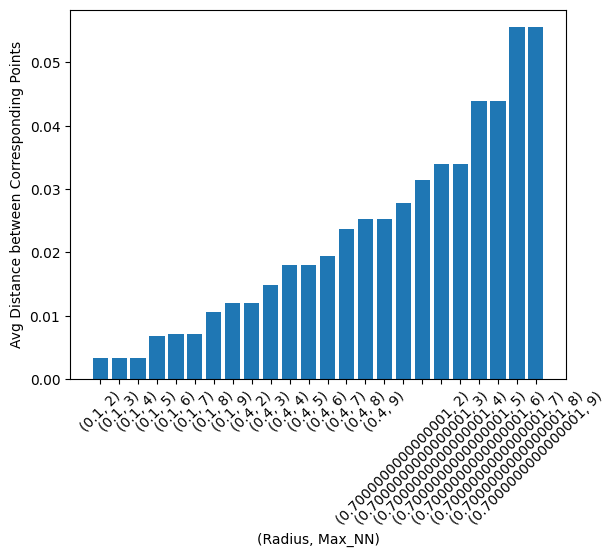

In [19]:

import math
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d



original_source_file = "../../interactive_pcd_lib/analyse_pcd_similarity2/source_cloud.ply"
raycasted_source_file = "../../interactive_pcd_lib/analyse_pcd_similarity2/jan31_raycasted1.ply"


pcd_source = o3d.io.read_point_cloud(original_source_file)
pcd_raycasted = o3d.io.read_point_cloud(raycasted_source_file)

radius_list = np.arange(0.1, 1, 0.3)
max_nn_list = [i for i in range(2, 10)]

radius_max_nn_combination = [(i, j) for i in radius_list for j in max_nn_list]
# print(radius_max_nn_combination)

avg_dist_dict = {}
avg_dist_list = []
indx = 0
pcd_tree = o3d.geometry.KDTreeFlann(pcd_source)
for radius, max_nn in radius_max_nn_combination:
    distances = []
    for point_raycasted in pcd_raycasted.points:
        k, idx, dist = pcd_tree.search_hybrid_vector_3d(point_raycasted, radius=radius, max_nn=max_nn)
        # print(k,idx, dist)
        if len(dist) == 0: # if nearest neighbour not found add a large distance
            print("-", end=")
            distances.append(10000)
        else:
            # distances.append(math.sqrt(np.asarray(dist)[0]))
            # distances.append(np.asarray(dist)[0])
            distances.append(np.asarray(dist).sum())

    avg_dist = sum(distances)/len(distances)
    # avg_dist_dict[indx] = avg_dist
    avg_dist_list.append(avg_dist)
    
    # indx += 1

plt.bar([str(i) for i in radius_max_nn_combination], sorted(avg_dist_list))

plt.xlabel("(Radius, Max_NN)")
plt.xticks(rotation=45)
plt.ylabel("Avg Distance between Corresponding Points")

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Text(0, 0.5, 'Avg Distance between Corresponding Points of Prototype and Raycasted Prototype')

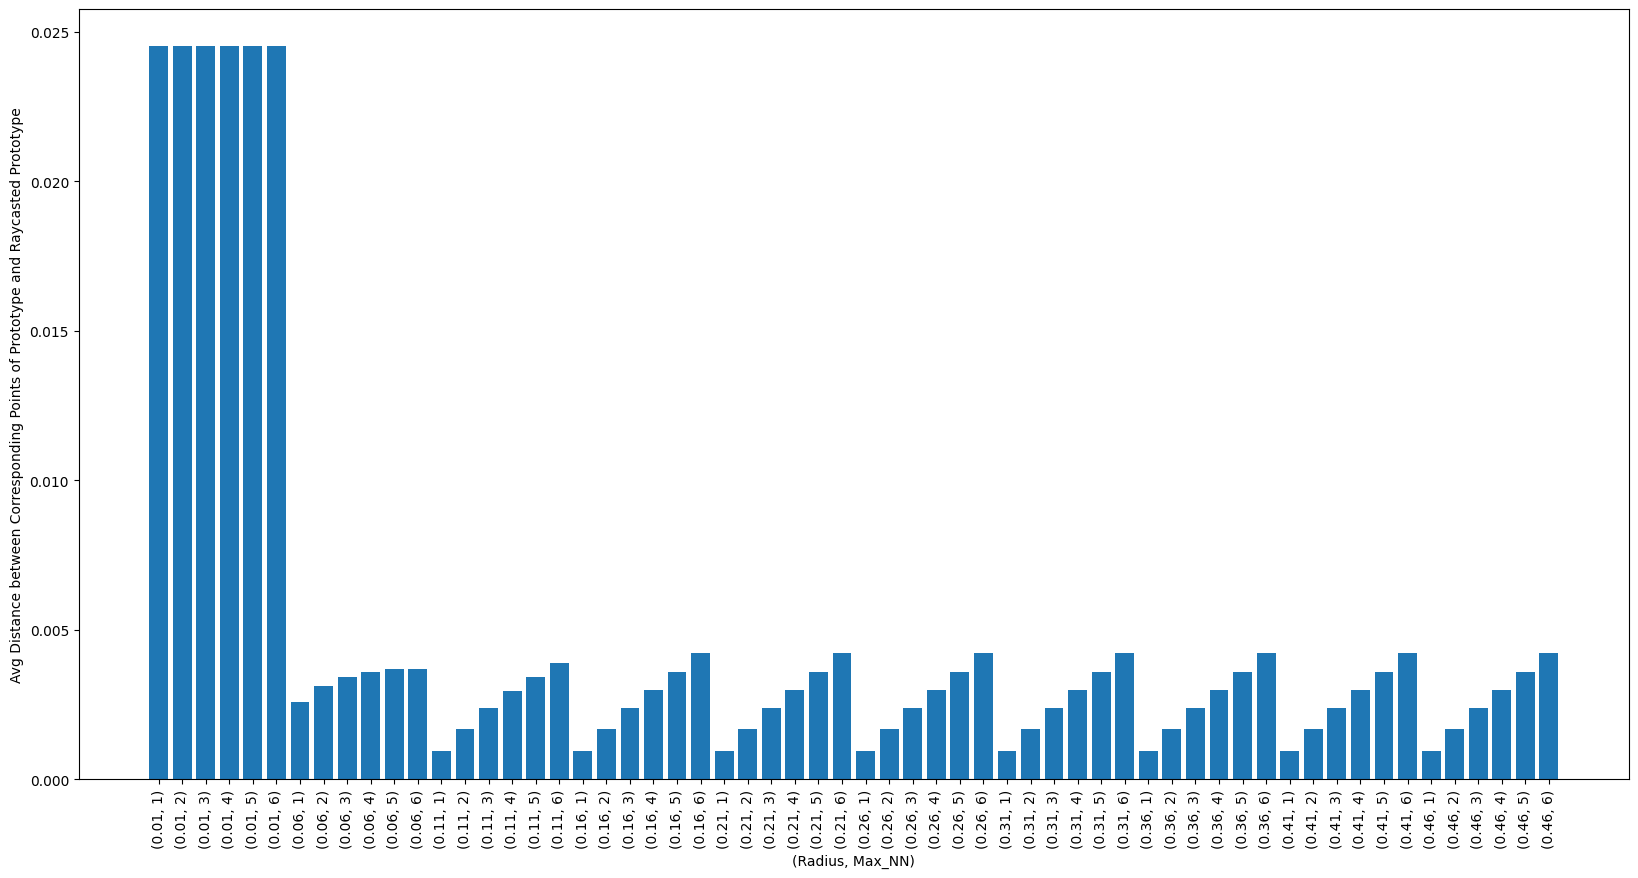

In [21]:

import math
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d



original_source_file = "../../interactive_pcd_lib/analyse_pcd_similarity2/source_cloud.ply"
raycasted_source_file = "../../interactive_pcd_lib/analyse_pcd_similarity2/jan31_raycasted1.ply"


pcd_source = o3d.io.read_point_cloud(original_source_file)
pcd_raycasted = o3d.io.read_point_cloud(raycasted_source_file)

radius_list = np.round(np.arange(0.01, 0.5, 0.05), 4)

max_nn_list = [i for i in range(1, 7)]

radius_max_nn_combination = [(i, j) for i in radius_list for j in max_nn_list]
# print(radius_max_nn_combination)

avg_dist_list = []
pcd_tree = o3d.geometry.KDTreeFlann(pcd_source)
for radius, max_nn in radius_max_nn_combination:
    distances = []
    for point_raycasted in pcd_raycasted.points:
        k, idx, dist = pcd_tree.search_hybrid_vector_3d(point_raycasted, radius=radius, max_nn=max_nn)
        # print(k,idx, dist)
        if len(dist) == 0: # if nearest neighbour not found add a large distance
            print("-", end="")
            distances.append(0.03)
        else:
            # distances.append(math.sqrt(np.asarray(dist)[0]))
            # distances.append(np.asarray(dist)[0])
            temp_avg_dist = np.asarray(dist).sum()/ len(dist)
            distances.append(temp_avg_dist)

    avg_dist = sum(distances)/len(distances)
    avg_dist_list.append(avg_dist)


plt.figure(figsize=(20, 10))
plt.bar([str(i) for i in radius_max_nn_combination], avg_dist_list)
plt.xlabel("(Radius, Max_NN)")
plt.xticks(rotation=90)
plt.ylabel("Avg Distance between Corresponding Points of Prototype and Raycasted Prototype")

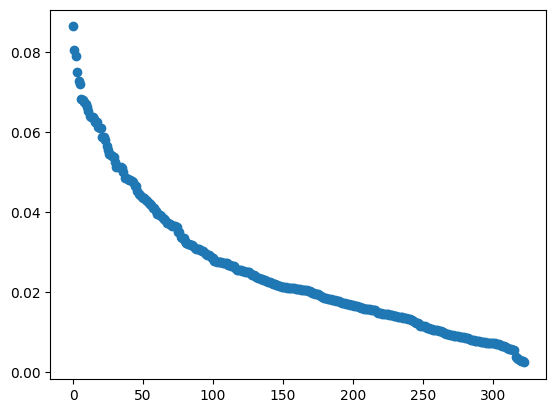

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

radius = 0.1
max_nn = 1

distances = []

pcd_tree = o3d.geometry.KDTreeFlann(pcd_source)

for point_raycasted in pcd_raycasted.points:
    k, idx, dist = pcd_tree.search_hybrid_vector_3d(point_raycasted, radius=radius, max_nn=max_nn)
    distances.append(math.sqrt(np.asarray(dist)[0]))
    
distances = sorted(distances, reverse=True)

plt.scatter(list(range(len(distances))), distances)

Text(0, 0.5, 'Distance Between corresponding points in Centimeters')

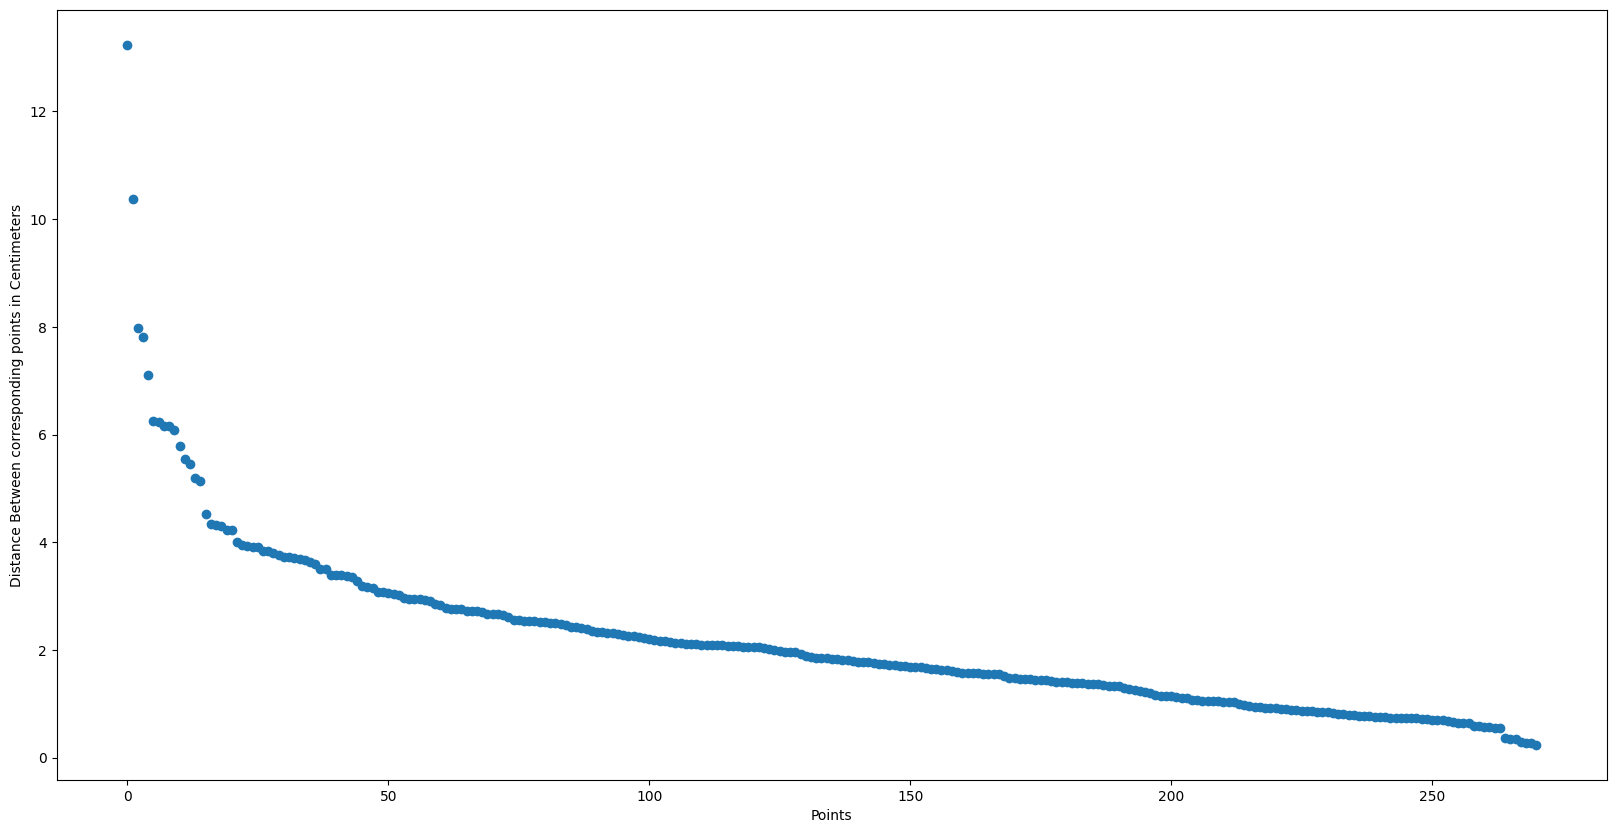

In [35]:
import math
import numpy as np
import matplotlib.pyplot as plt

radius = 0.3
max_nn = 1

distances = []

pcd_tree = o3d.geometry.KDTreeFlann(pcd_raycasted)

for point_source in pcd_source.points:
    k, idx, dist = pcd_tree.search_hybrid_vector_3d(point_source, radius=radius, max_nn=max_nn)
    if len(dist) == 0:
        distances.append(1) # appending a high value if no neighbour found
    else:
        d = math.sqrt(np.asarray(dist)[0]) * 100
        distances.append(d)
    
distances = sorted(distances, reverse=True)

plt.figure(figsize=(20,10))
plt.scatter(list(range(len(distances))), distances)
plt.xlabel("Points")
plt.ylabel("Distance Between corresponding points in Centimeters")

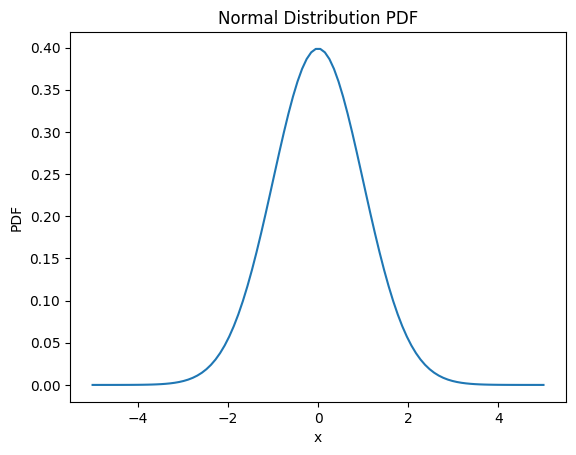

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the distribution parameters
mu = 0  # mean
sigma = 1  # standard deviation

# Generate a range of x values
x = np.linspace(-5, 5, 100)

# Calculate the PDF
pdf = norm.pdf(x, mu, sigma)

# Plot the PDF
plt.plot(x, pdf)

plt.title('Normal Distribution PDF')
plt.xlabel('x')
plt.ylabel('PDF')

plt.show()

In [1]:
def get_bin_size_for_histogram(_data):
    """
    Bin calculated using Freedman-Diaconis rule for the histogram plot
    """
    iqr = np.percentile(_data, 75) - np.percentile(_data, 25)
    bin_width = 2 * iqr / np.power(len(_data), 1/3)
    num_bins = int((np.max(_data) - np.min(_data)) / bin_width)
    return num_bins

def display_hist_from_seaborn(feature_array, axis_name="No Name", num_bins=None):
    if num_bins is not None:
        axis = sns.displot(feature_array, bins=num_bins, kde=True)
        axis.set_xlabels(axis_name)
        return
    try:
        number_of_bins = get_bin_size_for_histogram(feature_array)
        print(number_of_bins)
        axis = sns.displot(feature_array, bins=number_of_bins, kde=True)
    except Exception as e:
        print(f"Exception Occured,{e}, plot may not be consistent")
        axis = sns.displot(feature_array, bins=50,  kde=True,)
    axis.set_xlabels(axis_name)

# Finding Distance between corresponding points in the prototype cloud and the raycasted prototype

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
14


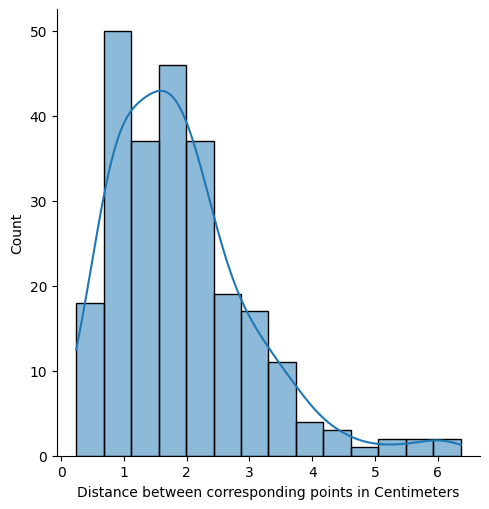

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import open3d as o3d

radius = 0.3
max_nn = 1

distances = []

original_source_file = "../../interactive_pcd_lib/jan31/source_cloud.ply"
raycasted_source_file = "../../interactive_pcd_lib/jan31/raycasted_source_cloud.ply"

pcd_source = o3d.io.read_point_cloud(original_source_file)
pcd_raycasted = o3d.io.read_point_cloud(raycasted_source_file)

pcd_tree = o3d.geometry.KDTreeFlann(pcd_source)

for point_raycasted in pcd_raycasted.points:
    k, idx, dist = pcd_tree.search_hybrid_vector_3d(point_raycasted, radius=radius, max_nn=max_nn)
    if len(dist) == 0:
        distances.append(1) # appending a high value if no neighbour found
    else:
        d = math.sqrt(np.asarray(dist)[0]) * 100
        distances.append(d)
    
distances = sorted(distances, reverse=True)


# mu = 0  # mean
# sigma = 1  # standard deviation

# plt.figure(figsize=(10,8))
# # Calculate the PDF
# pdf = norm.pdf(distances, mu, sigma)

# # Plot the PDF
# plt.plot(distances, pdf)
# plt.hist(distances, density=True, label='Histogram')

# plt.title('Normal Distribution PDF')
# plt.xlabel("Distance Between corresponding points in Centimeters")
# plt.ylabel("PDF")

# plt.show()
# plt.scatter(list(range(len(distances))), distances)
display_hist_from_seaborn(distances, axis_name="Distance between corresponding points in Centimeters")

45


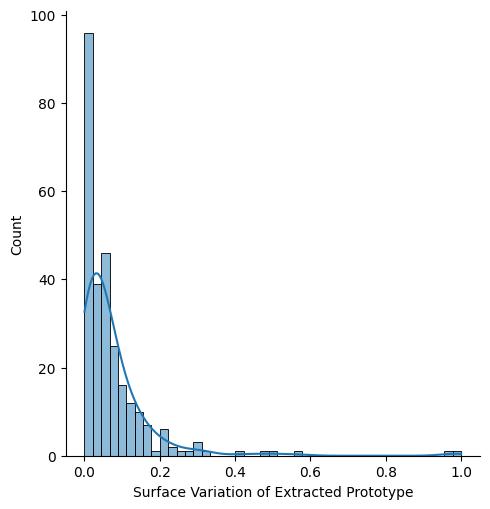

In [4]:
from surface_variation import PointCloudAnalysis

source_pcd = o3d.io.read_point_cloud(original_source_file)

search_tree = o3d.geometry.KDTreeSearchParamHybrid(radius=0.3, max_nn=6)

src_pcd_obj = PointCloudAnalysis(pcd_source.points, search_tree=search_tree)

surf_var = src_pcd_obj.get_normalized_surface_variation()

display_hist_from_seaborn(surf_var, "Surface Variation of Extracted Prototype")

33


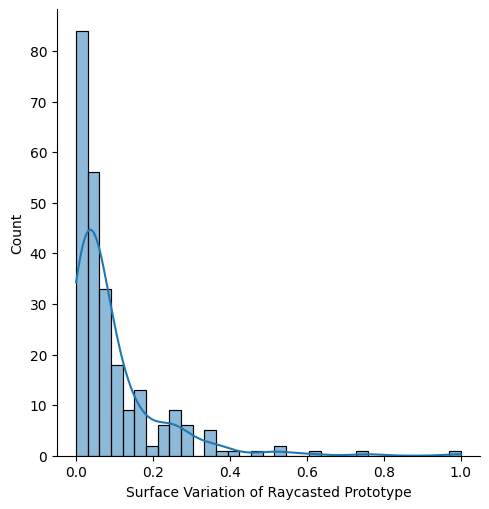

In [6]:
from surface_variation import PointCloudAnalysis

pcd = o3d.io.read_point_cloud(raycasted_source_file)

search_tree = o3d.geometry.KDTreeSearchParamHybrid(radius=0.3, max_nn=6)

pcd_obj = PointCloudAnalysis(pcd.points, search_tree=search_tree)

surf_var = pcd_obj.get_normalized_surface_variation()

display_hist_from_seaborn(surf_var, "Surface Variation of Raycasted Prototype")

# Plotting x vs y vs z axis 

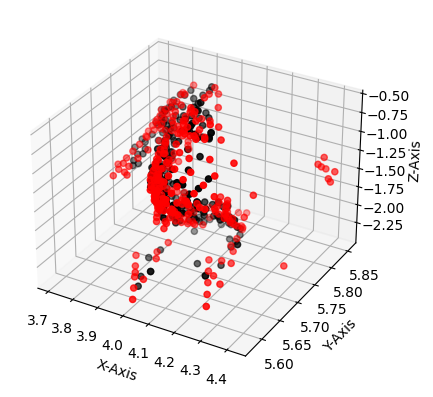

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import open3d as o3d


original_source_file = "../../interactive_pcd_lib/jan31/source_cloud.ply"
raycasted_source_file = "../../interactive_pcd_lib/jan31/raycasted_source_cloud.ply"


pcd_source = o3d.io.read_point_cloud(original_source_file)  # Replace with your actual point cloud

# Convert the point cloud to a numpy array
points_source = np.asarray(pcd_source.points)

# Separate the x, y, and z coordinates
x_source = points_source[:, 0]
y_source = points_source[:, 1]
z_source = points_source[:, 2]



# Raycasted
pcd_raycasted = o3d.io.read_point_cloud(raycasted_source_file)  # Replace with your actual point cloud

# Convert the point cloud to a numpy array
points_raycasted = np.asarray(pcd_raycasted.points)

# Separate the x, y, and z coordinates
x_raycasted = points_raycasted[:, 0]
y_raycasted = points_raycasted[:, 1]
z_raycasted = points_raycasted[:, 2]



# Create a new figure
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the point cloud
ax.scatter(x_source, y_source, z_source, color='red')
ax.scatter(x_raycasted, y_raycasted, z_raycasted, color="black")
ax.set_xlabel("X-Axis")
ax.set_ylabel("Y-Axis")
ax.set_zlabel("Z-Axis")

plt.show()

# Comparision of ground truth shadow and predicted shadow

In [1]:
ground_truth_shadow = "../../interactive_pcd_lib/jan31/ground_truth_casted_shadow_on_roi.ply"
predicted_shadow = "../../interactive_pcd_lib/jan31/predicted_casted_shadow_on_roi.ply"

In [2]:
import open3d as o3d

pcd_ground_truth = o3d.io.read_point_cloud(ground_truth_shadow)
pcd_predicted = o3d.io.read_point_cloud(predicted_shadow)


---------------------------------Not found Points :  33


Text(0, 0.5, 'Avg Distance between Corresponding Points of Prototype and Raycasted Prototype')

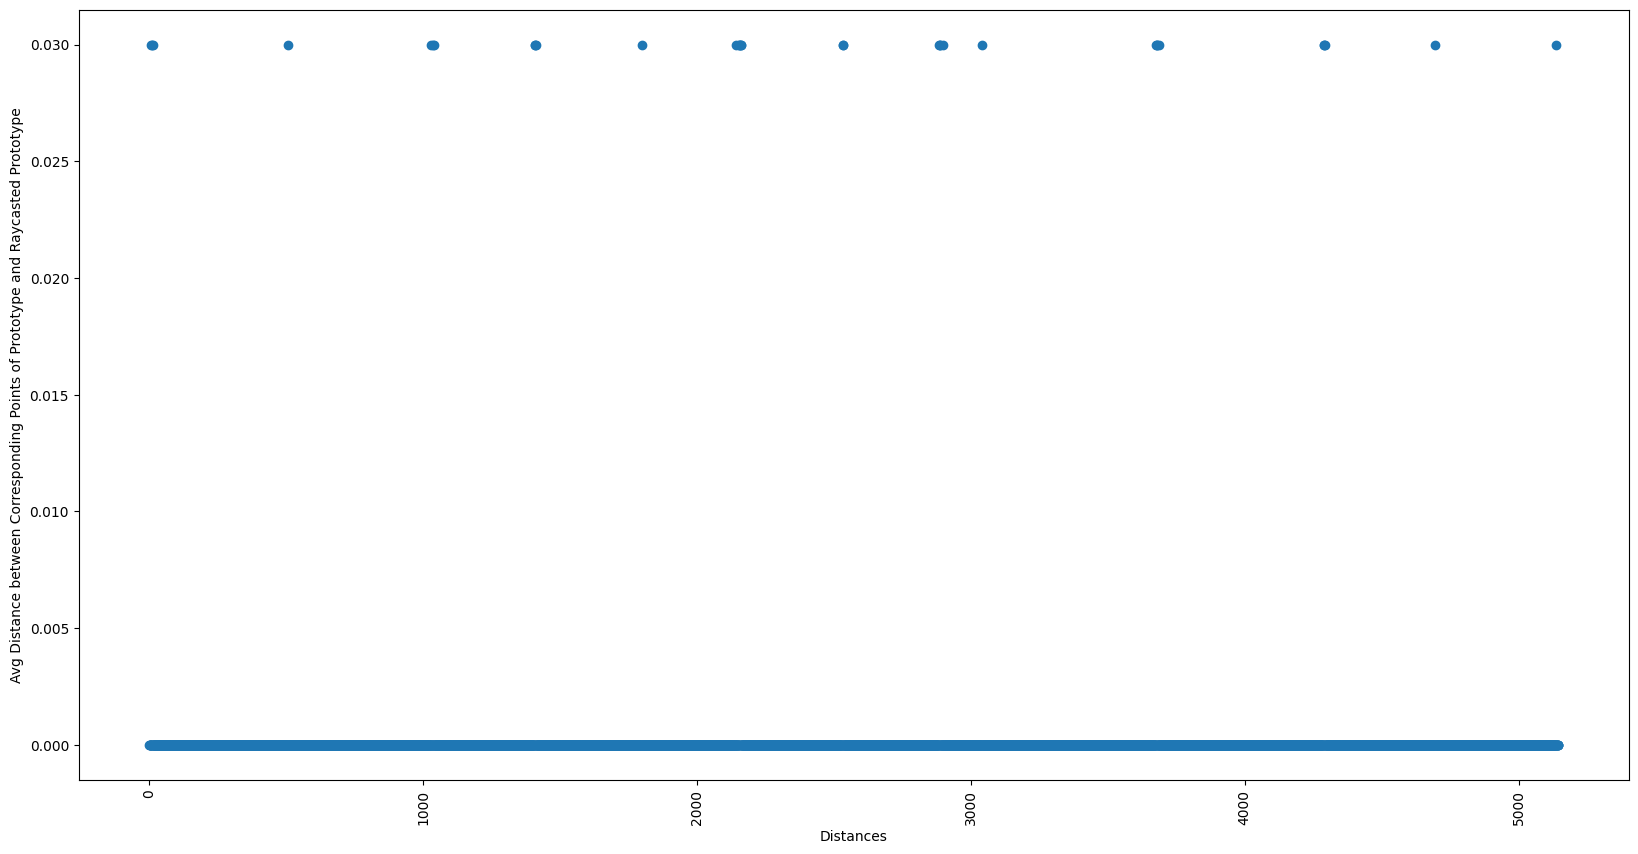

In [6]:

import math
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d


ground_truth_shadow = "../../interactive_pcd_lib/jan31/ground_truth_casted_shadow_on_roi.ply"
predicted_shadow = "../../interactive_pcd_lib/jan31/predicted_casted_shadow_on_roi.ply"


pcd_ground_truth = o3d.io.read_point_cloud(ground_truth_shadow)
pcd_predicted = o3d.io.read_point_cloud(predicted_shadow)

radius = 0.03
max_nn = 1

not_found_points_list = []
distances = []
not_found_points_count = 0
pcd_tree = o3d.geometry.KDTreeFlann(pcd_ground_truth)
for point_predicted in pcd_predicted.points:
    k, idx, dist = pcd_tree.search_hybrid_vector_3d(point_predicted, radius=radius, max_nn=max_nn)
    # print(k,idx, dist)
    if len(dist) == 0: # if nearest neighbour not found add a large distance
        print("-", end="")
        not_found_points_count += 1
        distances.append(0.03)
    else:
        # distances.append(math.sqrt(np.asarray(dist)[0]))
        # distances.append(np.asarray(dist)[0])
        temp_avg_dist = np.asarray(dist).sum()/ len(dist)
        distances.append(temp_avg_dist)


print("Not found Points : ", not_found_points_count)

plt.figure(figsize=(20, 10))
plt.scatter(list(range(len(distances))), distances)
plt.xlabel("Distances")
plt.xticks(rotation=90)
plt.ylabel("Avg Distance between Corresponding Points of Prototype and Raycasted Prototype")

In [9]:
distances = np.asarray(distances)

In [29]:
len(pcd_ground_truth.points)

5153

In [16]:
found_points = len(distances[distances < 0.00001])

In [18]:
found_points

5113

In [30]:
5113/ 5153

0.9922375315350281

----------------------------------------Not found Points :  40


Text(0, 0.5, 'Avg Distance between Corresponding Points of Prototype and Raycasted Prototype')

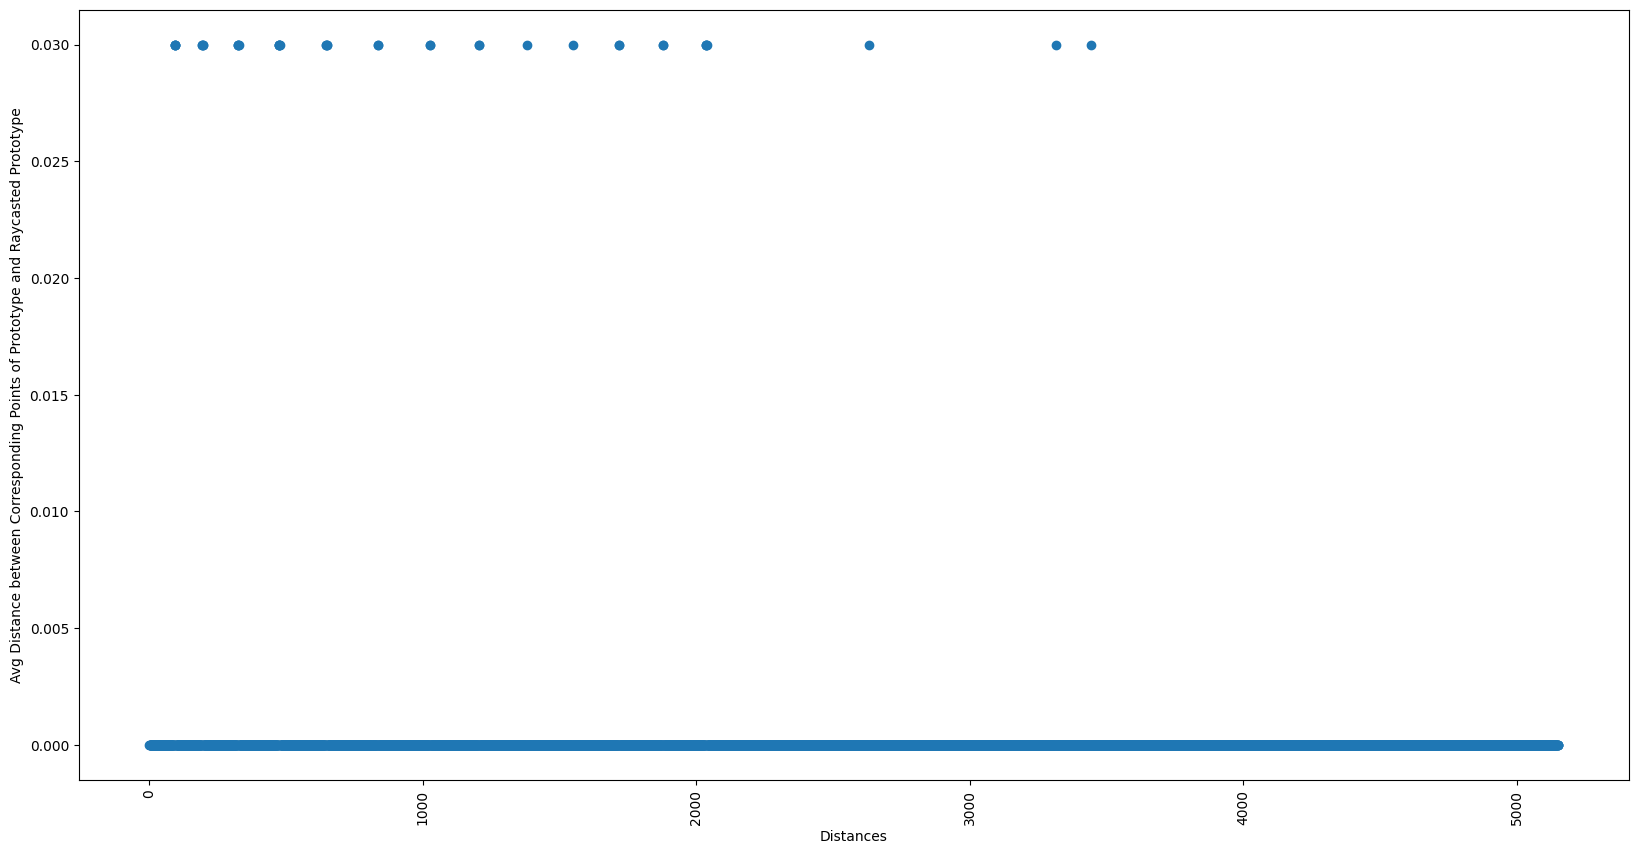

In [35]:

import math
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d


ground_truth_shadow = "../../interactive_pcd_lib/jan31/ground_truth_casted_shadow_on_roi.ply"
predicted_shadow = "../../interactive_pcd_lib/jan31/predicted_casted_shadow_on_roi.ply"


pcd_ground_truth = o3d.io.read_point_cloud(ground_truth_shadow)
pcd_predicted = o3d.io.read_point_cloud(predicted_shadow)

radius = 0.03
max_nn = 1

not_found_points_list = []
distances = []
not_found_points_count = 0
pcd_tree = o3d.geometry.KDTreeFlann(pcd_predicted)
for point_ground_truth in pcd_ground_truth.points:
    k, idx, dist = pcd_tree.search_hybrid_vector_3d(point_ground_truth, radius=radius, max_nn=max_nn)
    # print(k,idx, dist)
    if len(dist) == 0: # if nearest neighbour not found add a large distance
        print("-", end="")
        not_found_points_count += 1
        distances.append(0.03)
    else:
        # distances.append(math.sqrt(np.asarray(dist)[0]))
        # distances.append(np.asarray(dist)[0])
        temp_avg_dist = np.asarray(dist).sum()/ len(dist)
        distances.append(temp_avg_dist)


print("Not found Points : ", not_found_points_count)

plt.figure(figsize=(20, 10))
plt.scatter(list(range(len(distances))), distances)
plt.xlabel("Distances")
plt.xticks(rotation=90)
plt.ylabel("Avg Distance between Corresponding Points of Prototype and Raycasted Prototype")

In [37]:
distances = np.asarray(distances)
found_points = len(distances[distances < 0.00001])
print(found_points)

5113


In [38]:
len(pcd_ground_truth.points)

5153

In [39]:
len(pcd_predicted.points)

5146

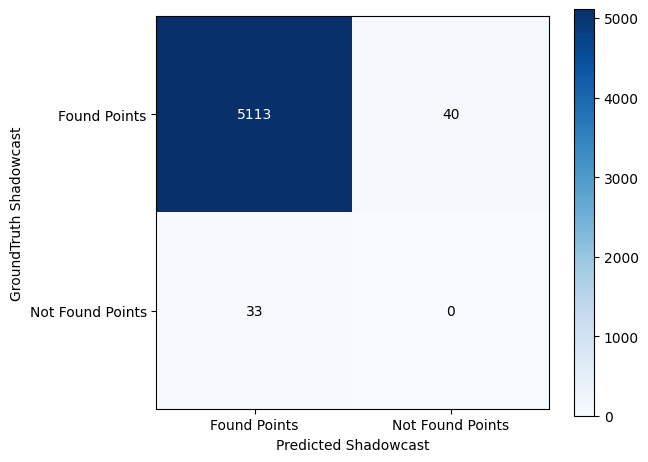

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming cm is your 2x2 confusion matrix
cm = np.array([[5113, 40], [33, 0]])

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=['Found Points', 'Not Found Points'], yticklabels=['Found Points', 'Not Found Points'],
       # title='Confusion Matrix',
       ylabel='GroundTruth Shadowcast',
       xlabel='Predicted Shadowcast')

# Loop over data dimensions and create text annotations.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")

fig.tight_layout()
plt.show()

In [54]:
tp = 5113

tn = 0

fp = 33

fn = 40


precision = tp / (tp + fp )

recall = tp / (tp + fn)

f1_score = (2* precision * recall)/(precision + recall)

In [55]:
f1_score

0.9929119331973978